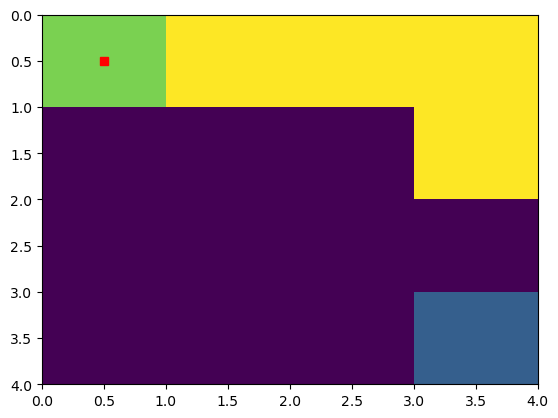

<Figure size 640x480 with 0 Axes>

[[0.8 1.  1.  1. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]]


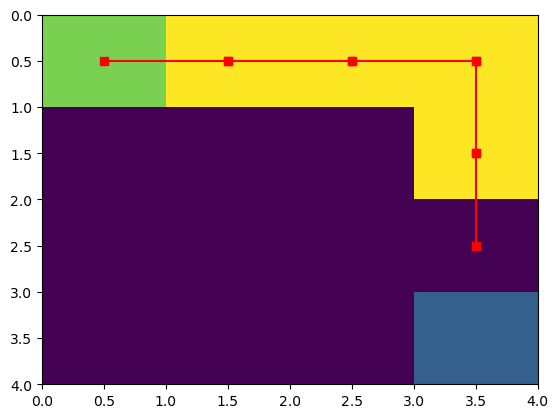

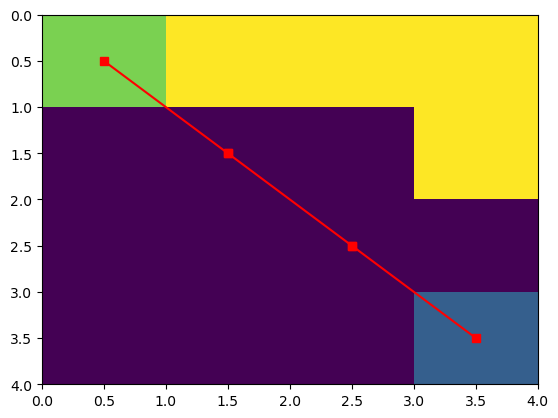

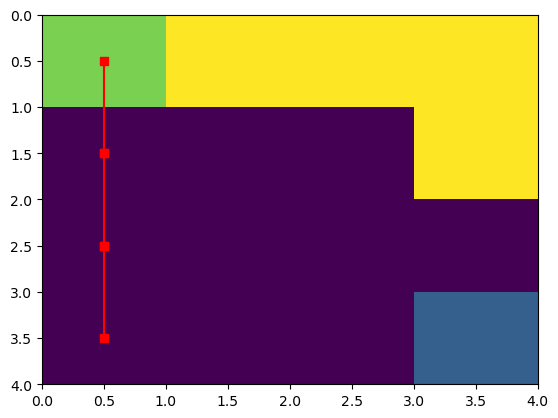

Caminho encontrado:
[(0, 0), array([1, 0]), array([2, 0]), array([3, 0]), array([3, 1]), array([2, 1]), array([1, 1]), array([1, 2]), array([2, 2]), array([3, 2]), array([3, 3])]


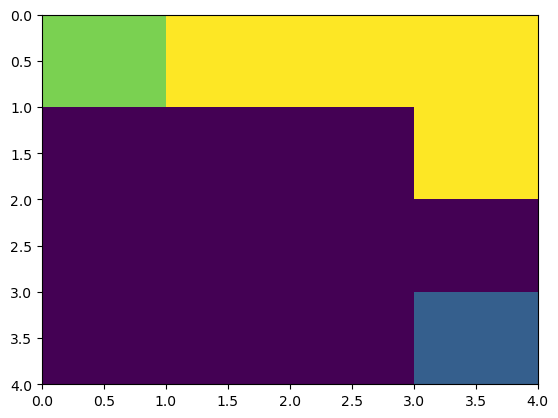

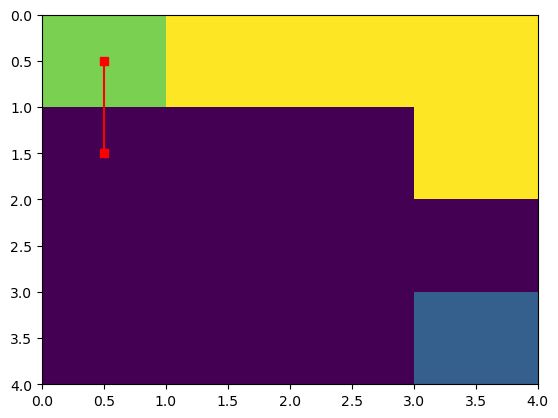

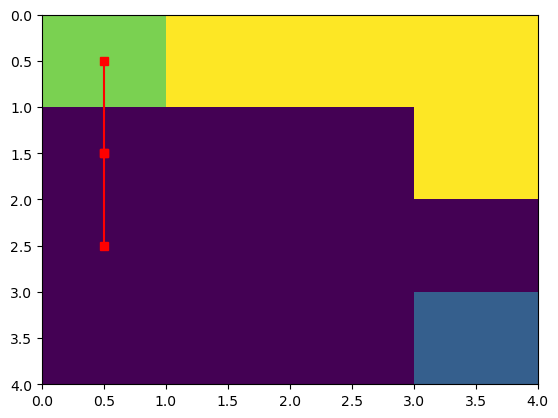

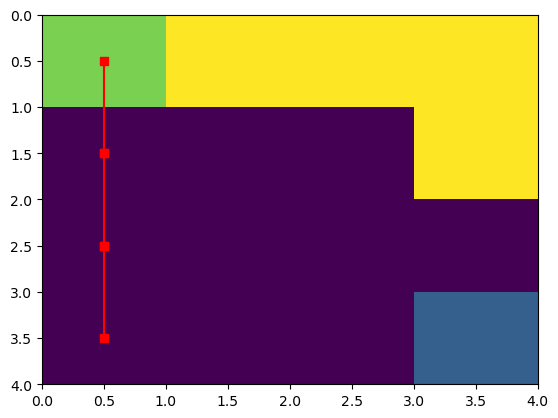

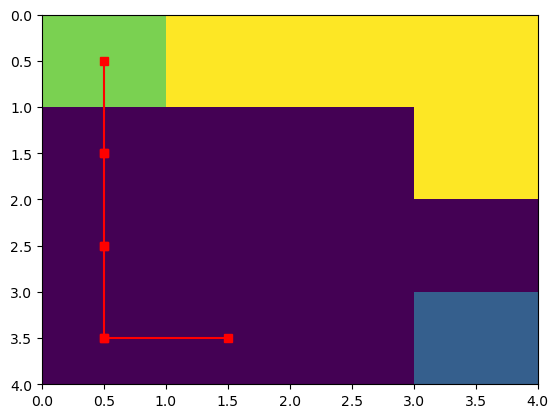

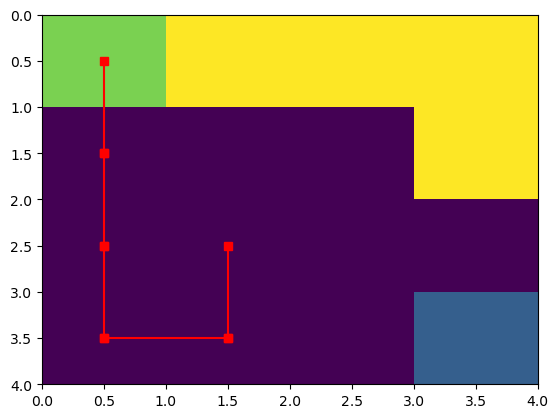

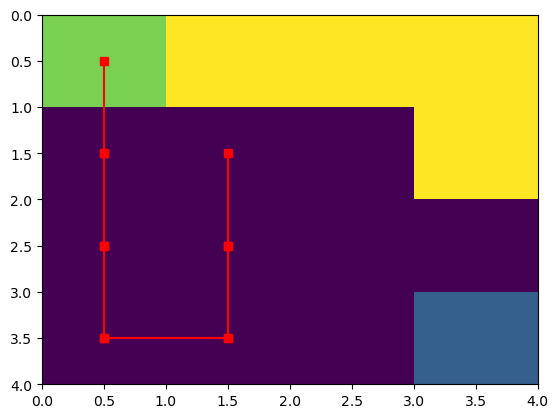

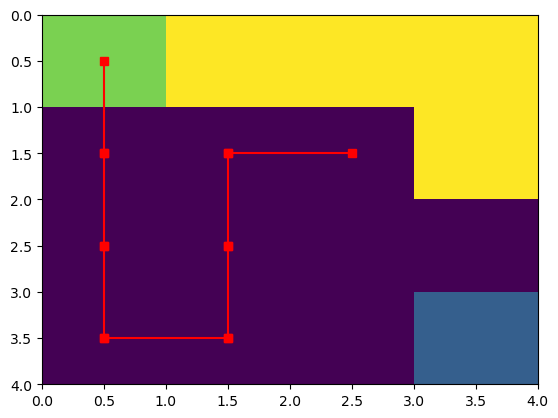

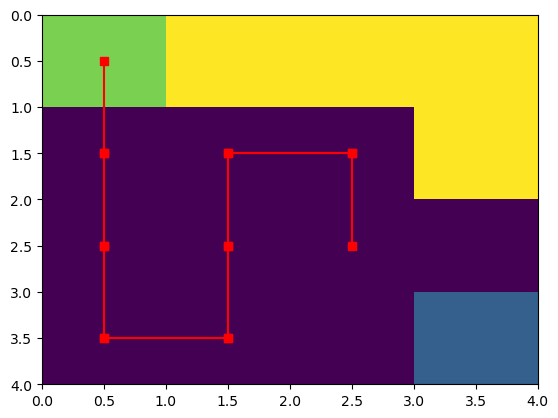

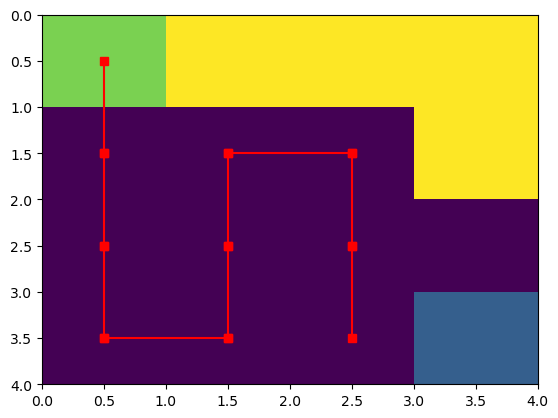

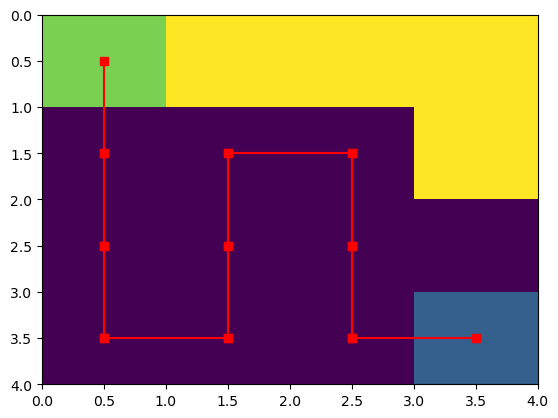

<Figure size 640x480 with 0 Axes>

Caminho encontrado:
[(0, 0), array([1, 0]), array([2, 0]), array([1, 1]), array([3, 0]), array([2, 1]), array([2, 1]), array([1, 2]), array([3, 1]), array([3, 1]), array([2, 2]), array([3, 1]), array([2, 2]), array([2, 2]), array([3, 2]), array([3, 2]), array([3, 2]), array([2, 3]), array([3, 2]), array([3, 2]), array([2, 3]), array([3, 2]), array([2, 3]), array([3, 3])]


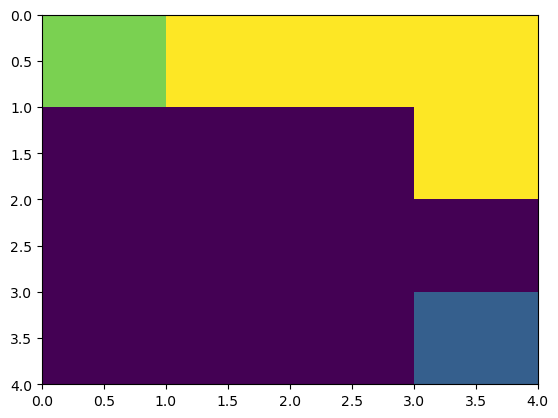

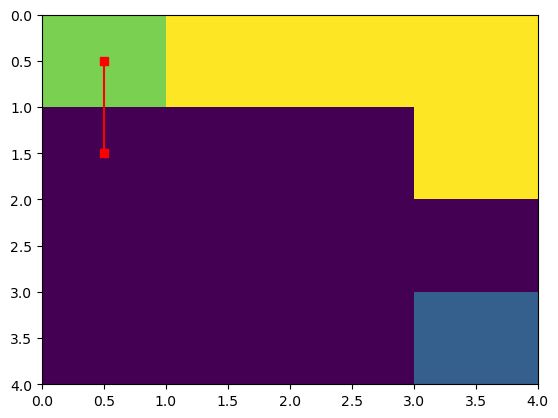

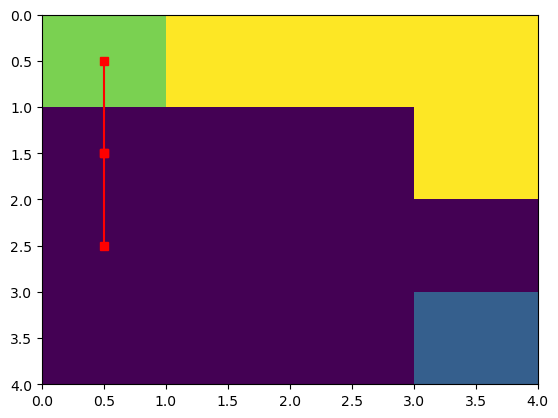

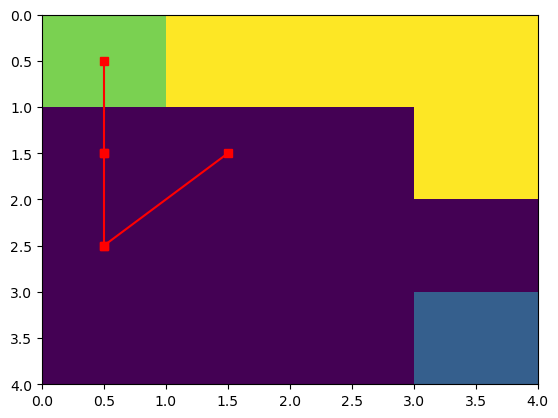

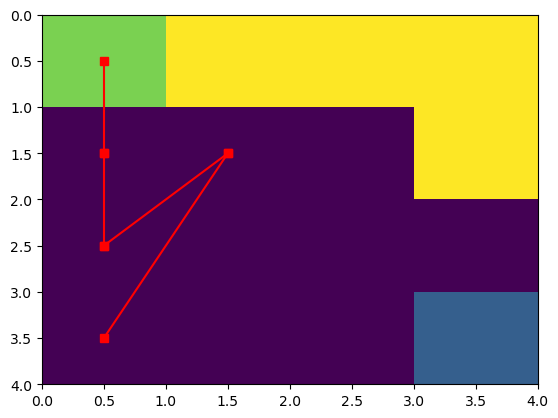

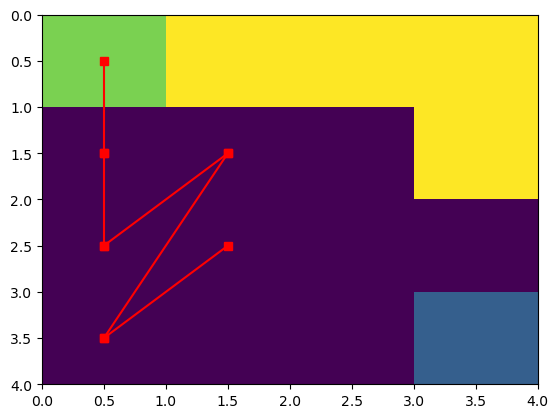

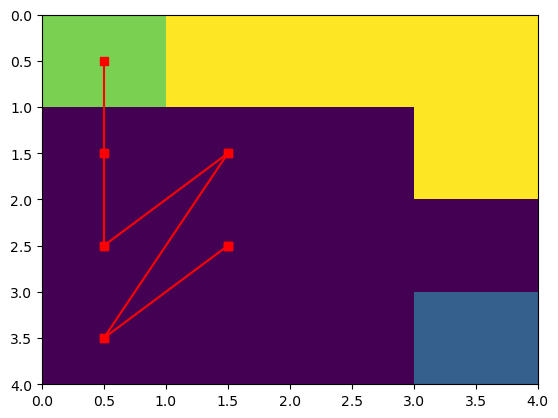

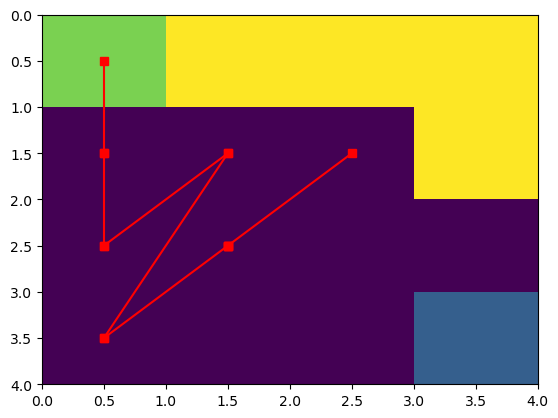

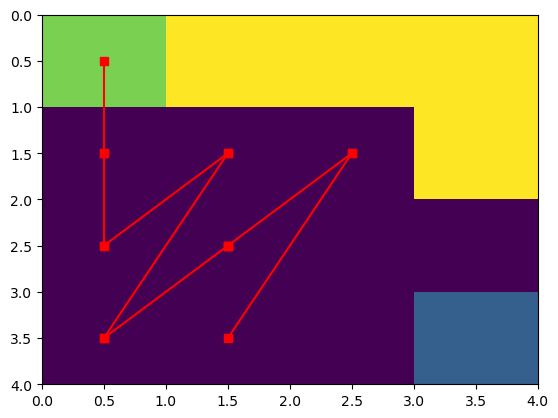

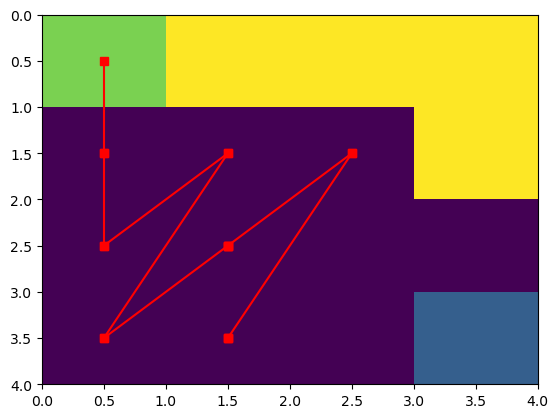

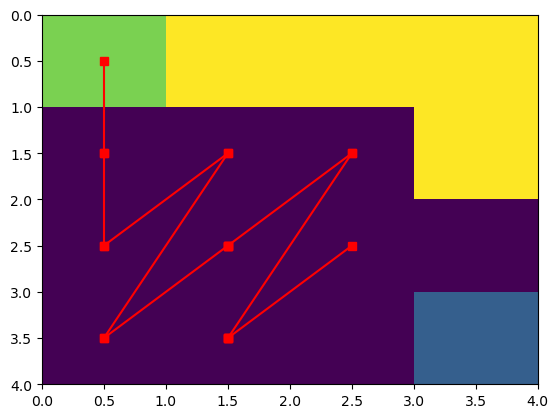

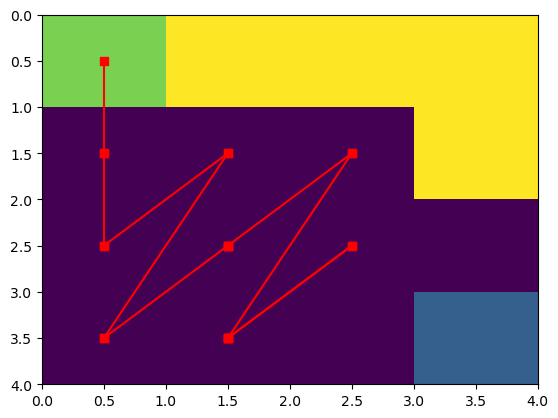

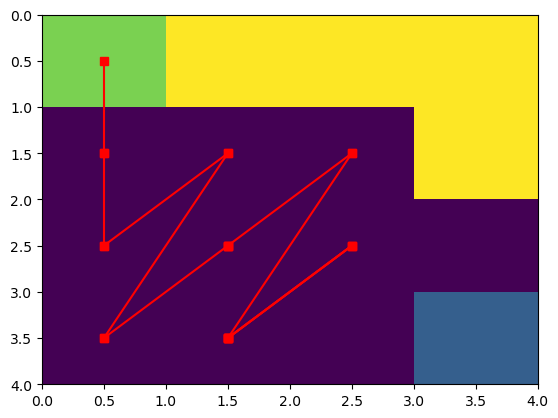

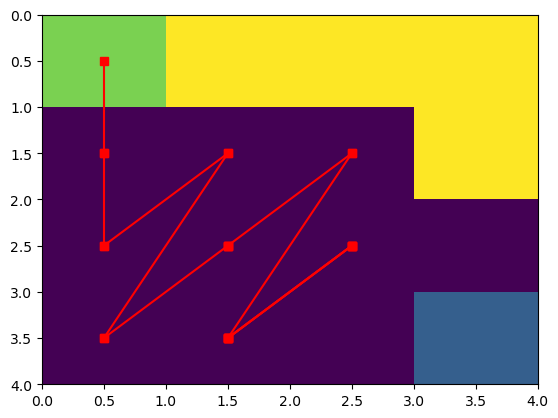

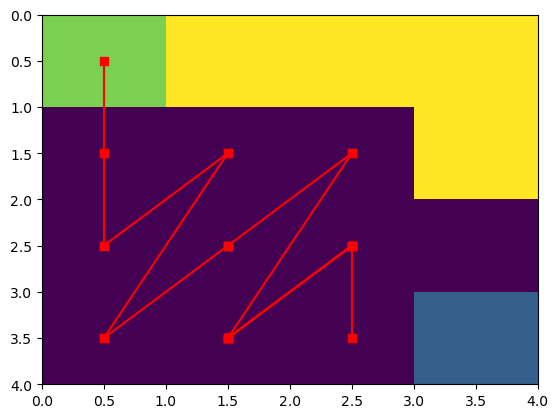

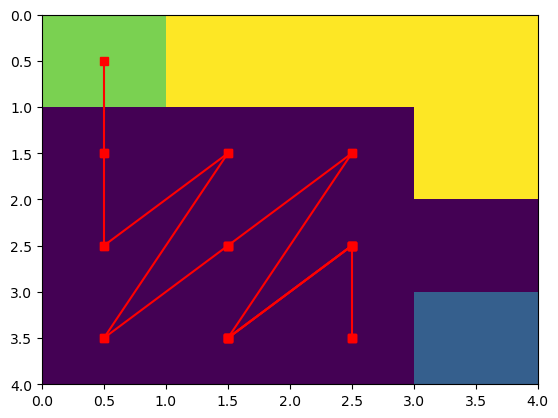

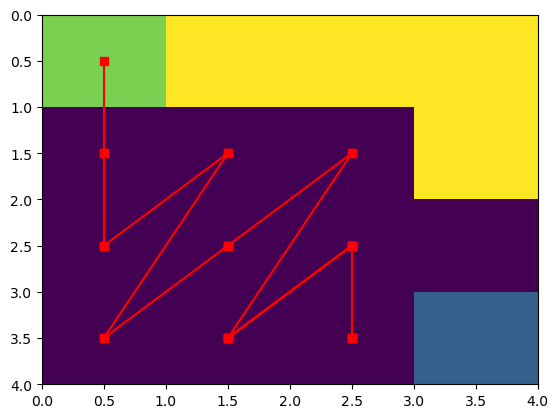

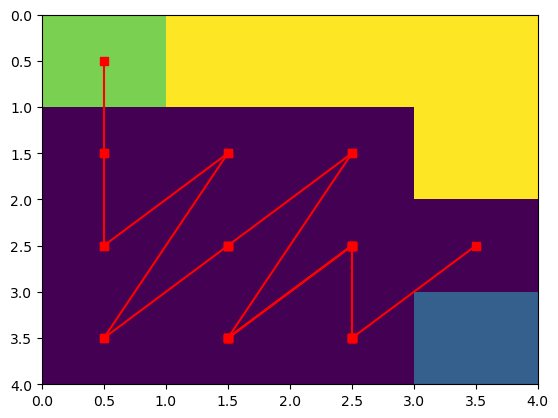

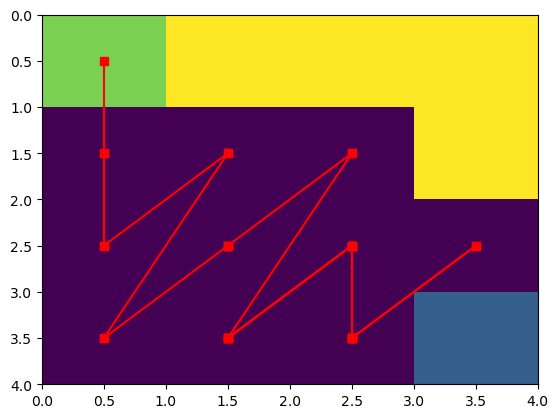

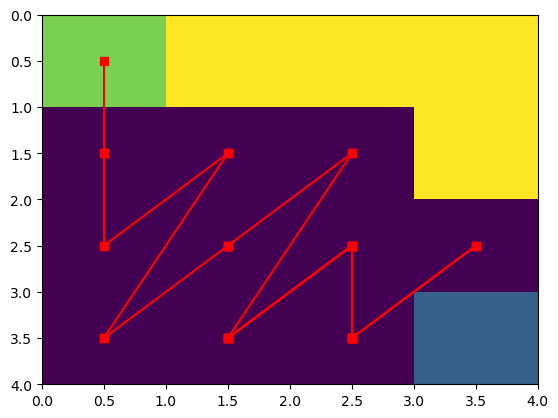

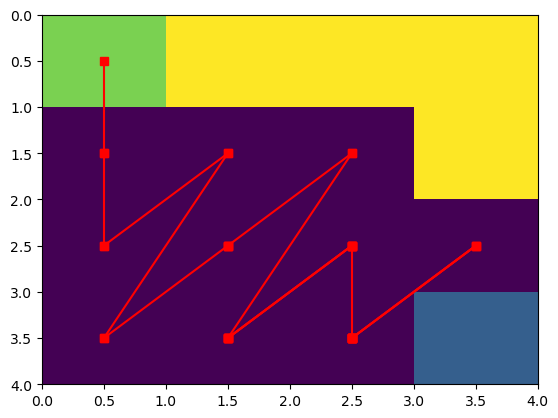

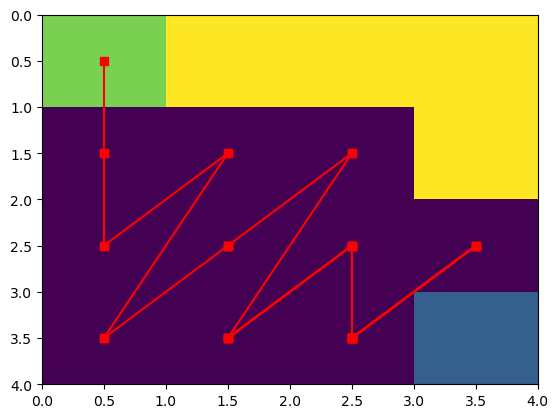

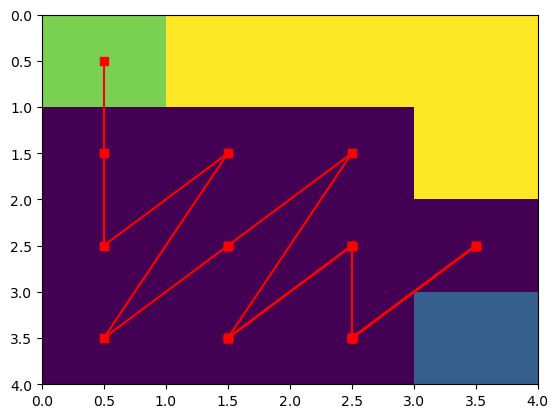

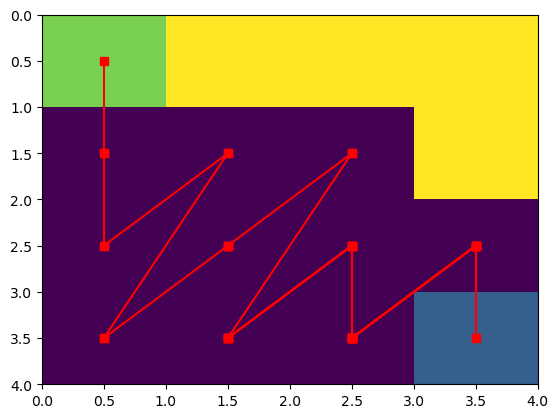

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class Maze():

    def __init__(self,nrow,ncol,start,exit,pobs=.3,pause=1):

        self.map = np.zeros((nrow,ncol))
        self.start = np.array(start)
        self.exit = np.array(exit)

        #add obstacles

        for i in range(self.map.shape[0]):
            for j in range(self.map.shape[1]):
                if np.random.rand() < pobs and ([i,j]!=self.start).any() and ([i,j]!=self.exit).any():
                    self.map[i][j] = 1

        ################## visualization ###################
        self.map[start[0]][start[1]] = 0.8 
        self.map[exit[0]][exit[1]] = 0.3
        self.pause = pause
        plt.ion()
        self.vis_map()
        plt.draw()
        plt.pause(pause)
        plt.clf()
        ###################################################
                   
    def initial_percepts(self):

        return {'pos':self.start,
                'exit':self.exit,
                'neighbors':self.get_neighbors(self.start),
                'path':[]}
    
    def get_neighbors(self, pos):
        directions = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
        neighbors = []

        for direction in directions:
            neighbor = pos + direction
            x, y = neighbor
            if 0 <= x < self.map.shape[0] and 0 <= y < self.map.shape[1] and self.map[x][y] != 1:
                neighbors.append(neighbor)

        return neighbors
    
    def state_transition(self,action):

        ################## visualization ###################
        plt.ion()
        self.plot_path(action['path'],self.pause)
        ####################################################

        return {'pos': action['move_to'],
                'exit':self.exit,
                'neighbors':self.get_neighbors(action['move_to']),
                'path':action['path']}
################################ DFS ################################    
    def dfs(self, current_pos, visited, path):
        visited[current_pos[0]][current_pos[1]] = True
        path.append(current_pos)

        if np.array_equal(current_pos, self.exit):
            return True

        for neighbor in self.get_neighbors(current_pos):
            if not visited[neighbor[0]][neighbor[1]]:
                if self.dfs(neighbor, visited, path):
                    return True

        path.pop()
        return False
    
    def find_path_dfs(self):
        visited = np.zeros_like(self.map, dtype=bool)
        start_pos = tuple(self.start)
        path = []
        self.dfs(start_pos, visited, path)
        return path
    ################################ DFS ################################
    ################################ BFS ################################ 
    def bfs(self, start_pos, visited, path):
        queue = deque()
        queue.append(start_pos)

        while queue:
            current_pos = queue.popleft()
            visited[current_pos[0]][current_pos[1]] = True
            path.append(current_pos)

            if np.array_equal(current_pos, self.exit):
                return True

            for neighbor in self.get_neighbors(current_pos):
                if not visited[neighbor[0]][neighbor[1]]:
                    queue.append(neighbor)

        return False
    
    def find_path_bfs(self):
        visited = np.zeros_like(self.map, dtype=bool)
        start_pos = tuple(self.start)
        path = []
        self.bfs(start_pos, visited, path)
        return path
################################ BFS ################################ 
    
    
    # Visualization functions ###############################
    def plot_path(self, path, pause_time):
        plt.axes().invert_yaxis()
        plt.pcolormesh(self.map)
        for i in range(len(path)-1):
            plt.plot([path[i][1]+0.5,path[i+1][1]+0.5],[path[i][0]+0.5,path[i+1][0]+0.5],'-rs')
        plt.draw()
        plt.pause(pause_time)
        plt.clf()

    def vis_map(self):
        plt.axes().invert_yaxis()
        plt.pcolormesh(self.map)
        plt.plot(self.start[1]+0.5, self.start[0]+0.5,'rs')
        plt.show()
    ##########################################################



if __name__ == '__main__':

    nrow = 4
    ncol = 4
    env = Maze(nrow,ncol,[0,0],[nrow-1,ncol-1])

    print(env.map)

    actions = []
    actions.append({'move_to':[0,0],
              'path':[[0,0],[0,1],[0,2],[0,3],[1,3],[2,3]]})
    actions.append({'move_to':[0,0],
              'path':[[0,0],[1,1],[2,2],[3,3]]})
    actions.append({'move_to':[0,0],
              'path':[[0,0],[1,0],[2,0],[3,0]]})
    
    for a in actions:
        env.state_transition(a)
    
    path = env.find_path_dfs()
    print("Caminho encontrado:")
    print(path)

    for i in range(len(path)):
        partial_path = path[:i+1]
        env.plot_path(partial_path, env.pause)

    plt.ioff()
    plt.show()

    path = env.find_path_bfs()
    print("Caminho encontrado:")
    print(path)

    for i in range(len(path)):
        partial_path = path[:i+1]
        env.plot_path(partial_path, env.pause)

    plt.ioff()
    plt.show()